In [2]:
from __future__ import print_function
from __future__ import division

In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import date
%matplotlib inline
    
data_dir = "./data/"
data_file = "data.csv"

In [4]:
# read data

master = pd.read_csv(data_dir + data_file, thousands=',')#,nrows=10000)
master.head()

,Unnamed: 0,claim_no,paid_proc_code,insurance_id,amount_approved,billing_physician,provider_title,date_entry
0,0,550786655,J1071,5008638,0.03,53483380,APN,2016-06-18 00:00:00
1,1,546156520,J1100,53520497,0.12,615,MD,2016-11-22 00:00:00
2,2,554257059,J7050,5355622,0.46,53480942,MD,2017-01-13 00:00:00
3,3,554403594,J7050,4221034,0.45,53480942,MD,2017-04-05 00:00:00
4,4,554151172,J7050,5008287,0.50,53480942,MD,2016-08-26 00:00:00


In [5]:
master.dtypes

Unnamed: 0             int64
claim_no               int64
paid_proc_code        object
insurance_id           int64
amount_approved      float64
billing_physician      int64
provider_title        object
date_entry            object
dtype: object

In [6]:
master['date_entry'] =  pd.to_datetime(master['date_entry'])

In [7]:
df = master[['date_entry', 'amount_approved']]
df.head()

,date_entry,amount_approved
0,2016-06-18,0.03
1,2016-11-22,0.12
2,2017-01-13,0.46
3,2017-04-05,0.45
4,2016-08-26,0.50


# EDA

## Description of prices column 

In [8]:
starting_des = master.amount_approved.describe()
print(starting_des)

print("\n\nstd = ",starting_des['std'])

count    8.813175e+06
mean     8.831032e+01
std      2.319095e+02
min      1.000000e-02
25%      2.994000e+01
50%      6.528000e+01
75%      9.790000e+01
max      2.076322e+04
Name: amount_approved, dtype: float64


std =  231.90946033637894


### hist with of prices

mean :  88.31032178868574


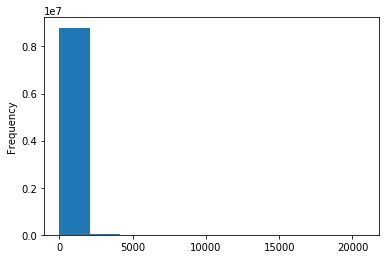

In [9]:
test1 = master
test1.amount_approved.plot(kind="hist")
print("mean : ", test1.amount_approved.mean())

### values below 500 prices only

mean :  71.60266327941123


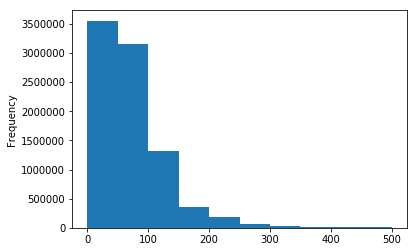

In [10]:
test1 = master[ master.amount_approved < 500]
test1.amount_approved.plot(kind="hist")
print("mean : ", test1.amount_approved.mean())

## Values with outliers removed

mean :  67.19297629129932


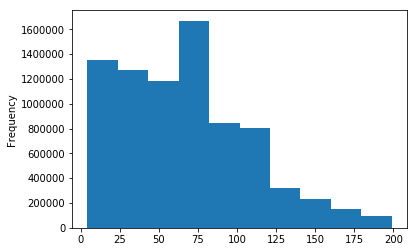

In [11]:
price = 'amount_approved'

_1, _2 = 0.05, 0.95

quantile=master[price].quantile([_1,_2])
q1, q2 = quantile[_1], quantile[_2]

df_without = master[master[price] > q1]
df_without = df_without[df_without[price] < q2]

df_without[price].plot(kind='hist')
print("mean : ", df_without.amount_approved.mean())

In [20]:
ending_des = df_without.amount_approved.describe()


print("===Before removing outliers===")

print("mean : ", master.amount_approved.mean())
print("medium : ", master.amount_approved.median())
print("mode : ", master.amount_approved.mode().iloc[0])

print("\nstd : ",starting_des['std'])
print("max : ",starting_des['max'])
print("min : ",starting_des['min'])


print("\n\n===After removing outliers===")

print("mean : ", df_without.amount_approved.mean())
print("medium : ", df_without.amount_approved.median())
print("mode : ", df_without.amount_approved.mode().iloc[0])

print("\nstd : ",ending_des['std'])
print("max : ",ending_des['max'])
print("min : ",ending_des['min'])

===Before removing outliers===
mean :  88.31032178868574
medium :  65.28
mode :  2.94

std :  231.90946033637894
max :  20763.22
min :  0.01


===After removing outliers===
mean :  67.19297629129932
medium :  65.32
mode :  69.11

std :  41.794505908361565
max :  199.01
min :  4.24


## Description of prices column without outliers

In [18]:
print(ending_des)

count    7.928777e+06
mean     6.719298e+01
std      4.179451e+01
min      4.240000e+00
25%      3.417000e+01
50%      6.532000e+01
75%      9.364000e+01
max      1.990100e+02
Name: amount_approved, dtype: float64


## count comparison with and without outliers

In [19]:
diff =  ending_des / starting_des

print("count after removal :", diff["count"] * 100, "%")

count after removal : 89.96504664890917 %


# ---------------------------------------------------------------------------------------------------------------

# Trend of prices over a period

### Monthly trend of prices 

(62.5, 70)

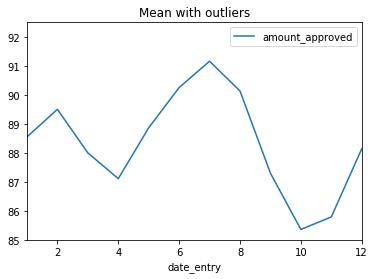

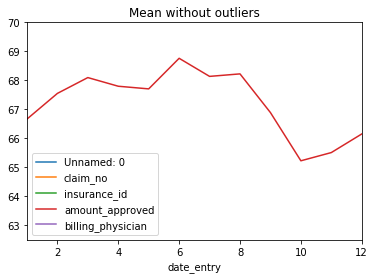

In [21]:
# mean
df.groupby([df.date_entry.dt.month]).mean().plot(title="Mean with outliers").set_ylim(85,92.5)
df_without.groupby([ df_without.date_entry.dt.month]).mean().plot(title="Mean without outliers").set_ylim(62.5,70)

### Yearly trend of prices

(4.23, 199.02)

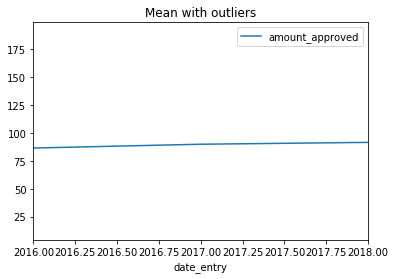

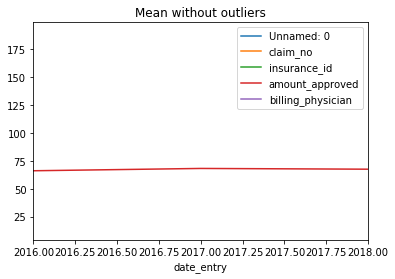

In [22]:
# mean
df.groupby([df.date_entry.dt.year]).mean().plot(title="Mean with outliers").set_ylim(q1,q2)
df_without.groupby([ df_without.date_entry.dt.year]).mean().plot(title="Mean without outliers").set_ylim(q1,q2)

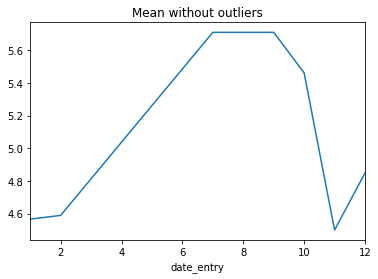

In [23]:
data1 = master[['date_entry', 'amount_approved', 'insurance_id', 'paid_proc_code']]

def filtered1(df, cpt, insr):
    
    price = 'amount_approved'

    df=df[df['paid_proc_code']==cpt]
    df=df[df['insurance_id']==insr]
    #print (df)
    
    _1, _2 = 0.05, 0.95
    quantile=df[price].quantile([_1,_2])
    q1, q2 = quantile[_1], quantile[_2]

    df = df[df[price] > q1]
    df = df[df[price] < q2]
    
    df[price].groupby([df.date_entry.dt.month]).mean().plot(title="Mean without outliers")
    
filtered1(data1, 'J1071', 5008638)

#### task

In [24]:
data2 = master[['date_entry', 'amount_approved',
                'insurance_id', 'paid_proc_code', 'billing_physician']].drop_duplicates()

def filtered2(df, date_range, cpt, insr, phy):
    start = pd.Timestamp(date_range[0])
    end = pd.Timestamp(date_range[1])
    
    price = 'amount_approved'
    
    df=df[df['date_entry']>start]
    df=df[df['date_entry']<end]
    
    df=df[df['paid_proc_code']==cpt]
    df=df[df['insurance_id']==insr]
    df=df[df['billing_physician']==phy]   
    
    gb_result = df[price].groupby([df.date_entry.dt.year, df.date_entry.dt.month]).mean()
    
    gtr_10 = gb_result[gb_result.pct_change() > 0.1]
    lwr_10 = gb_result[gb_result.pct_change() < -0.1]
    
    gtr_10_results = df.iloc[0:0]
    lwr_10_results = df.iloc[0:0]
    
    if gtr_10.shape[0]:
        for k,v in gtr_10.iteritems():
            date = pd.datetime(k[0], k[1], 1)
            
            tmp = df[df.date_entry.dt.year == date.year]
            tmp = tmp[df.date_entry.dt.month == date.month]
#             print(tmp)
            gtr_10_results = pd.concat([gtr_10_results, tmp])        
    
    if lwr_10.shape[0]:
        for k,v in lwr_10.iteritems():
            date = pd.datetime(k[0], k[1], 1)
            lwr_10_results.append(df[df['date_entry'] == date])
            
            tmp = df[df.date_entry.dt.year == date.year]
            tmp = tmp[df.date_entry.dt.month == date.month]
#             print(tmp)
            lwr_10_results = pd.concat([lwr_10_results, tmp])
    
    return (gtr_10_results, lwr_10_results)

#     for k,v in gb_result:
#         print(gb_result.get_group(k))
#         print(k)
#         print(v)
    
a, b = filtered2(data2, ['2014-6-01', '2018-1-01'], 'J1071', 5008638, 53483380)
print(a)
print(b)

      date_entry  amount_approved  insurance_id paid_proc_code  \
1674  2016-07-13             0.03       5008638          J1071   
1916  2016-07-25             5.71       5008638          J1071   
7218  2016-07-14             6.10       5008638          J1071   
7614  2016-07-02             6.10       5008638          J1071   
7964  2016-07-15             6.10       5008638          J1071   
7966  2016-07-09             6.10       5008638          J1071   
7967  2016-07-19             6.10       5008638          J1071   
7968  2016-07-12             6.10       5008638          J1071   
8379  2016-07-27             6.10       5008638          J1071   
13058 2016-07-08             6.10       5008638          J1071   
20341 2016-07-11             6.10       5008638          J1071   

       billing_physician  
1674            53483380  
1916            53483380  
7218            53483380  
7614            53483380  
7964            53483380  
7966            53483380  
7967            53

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


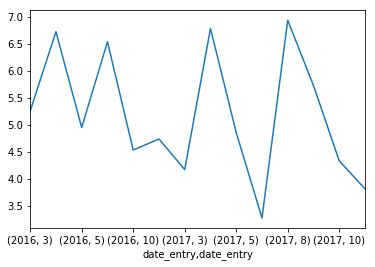

In [25]:
data3 = master[['date_entry', 'amount_approved', 'paid_proc_code', 'billing_physician']].drop_duplicates()

def filtered3(df, date_range, cpt):
    start = pd.Timestamp(date_range[0])
    end = pd.Timestamp(date_range[1])
    
    price = 'amount_approved'
    
    df=df[df['date_entry']>start]
    df=df[df['date_entry']<end]
    
    df=df[df['paid_proc_code']==cpt]
    
    gb_result = df[price].groupby([df.date_entry.dt.year, df.date_entry.dt.month]).mean()
    
    chg_10 = gb_result[gb_result.pct_change() > 0.1]
    chg_10 = pd.concat([chg_10, gb_result[gb_result.pct_change() < -0.1]])
    
    chg_10_results = df.iloc[0:0]
    
    if chg_10.shape[0]:
        for k,v in chg_10.iteritems():
            date = pd.datetime(k[0], k[1], 1)
            
            tmp = df[df.date_entry.dt.year == date.year]
            tmp = tmp[df.date_entry.dt.month == date.month]
#             print(tmp)
            chg_10_results = pd.concat([chg_10_results, tmp])        
    
    return chg_10_results

Changing = filtered3(data3, ['2014-6-01', '2018-1-01'], 'J1071')


Changing[price].groupby([Changing.date_entry.dt.year, Changing.date_entry.dt.month]).mean().plot()

# fulll work

In [55]:
def filtered4(df, date_range, cpt, insr, phy):
    start = pd.Timestamp(date_range[0])
    end = pd.Timestamp(date_range[1])
    
    price = 'amount_approved'
    
    df=df[df['date_entry'] > start]
    df=df[df['date_entry'] < end]
    
    df=df[df['paid_proc_code']==cpt]
    df=df[df['insurance_id']==insr]
    df=df[df['billing_physician']==phy]
    
    df=df[df['paid_proc_code']==cpt]
    
    gb_result = df[price].groupby([df.date_entry.dt.year, df.date_entry.dt.month]).mean()
    
    chg_10 = gb_result[gb_result.pct_change() > 0.1]
    chg_10 = pd.concat([chg_10, gb_result[gb_result.pct_change() < -0.1]])
    
    chg_10_results = df.iloc[0:0]
    
    if chg_10.shape[0]:
        for k,v in chg_10.iteritems():
            date = pd.datetime(k[0], k[1], 1)
            
            tmp = df[df.date_entry.dt.year == date.year]
            tmp = tmp[df.date_entry.dt.month == date.month]
            chg_10_results = pd.concat([chg_10_results, tmp])        
    
    return chg_10_results


############################### START

data4 = master[['date_entry', 'amount_approved',
                'insurance_id', 'paid_proc_code', 'billing_physician']].drop_duplicates()

# provider = data4['billing_physician'].value_counts().index[0] # 53481606
provider = 53481606

data4 = data4[data4['billing_physician'] == provider]

# isr_num = data4['insurance_id'].value_counts().index[0] # 4221034
isr_num = 4221034

data4 = data4[data4['insurance_id'] == isr_num]

cpts = data4['paid_proc_code'].drop_duplicates()

print("len", len(cpts))
print(cpts)



len 209
160        J2405
339        J7613
372        J7620
406        J1100
5063       A6216
7716       36415
7720       J1200
11225      J0696
12243      81002
12608      J7644
12614      J1885
14733      A6449
25898      J7030
38039      J3420
38694      85014
43871      J7060
48696      82962
49914      84703
51921      J2930
54952      A4565
56148      81000
56193      87210
56680      86308
65937      87804
65938      87880
67510      82330
69969      99173
71086      J7610
73763      80048
75523      J0561
           ...  
6117888    99382
6179666    12013
6211634    12011
6235019    99386
6353016    87505
6393200    12042
6413965    11442
6416452    11403
6426856    99387
6694330    90620
6722533    93978
6724285    13131
6766802    93306
6827242    12051
6988155    11444
7052527    11043
7057385    12032
7149129    17110
7168647    99393
7226001    99392
7626955    10120
7702463    93308
7710812    10140
7721224    24640
7787860    46320
7796231    73550
7979639    93880
828898

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


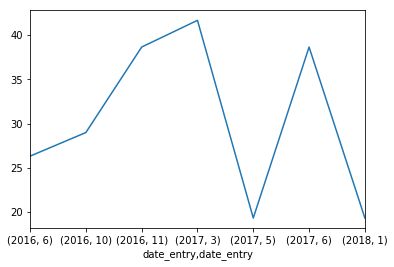

In [56]:
cpts_subset = cpts.value_counts().index[:]

cpt = cpts_subset[2] #

# checking one cpt
Changing = filtered4(data4, ['2000-6-01', '2020-1-01'],cpt, isr_num, provider)
if Changing.shape[0]:
    Changing[price].groupby([Changing.date_entry.dt.year, Changing.date_entry.dt.month]).mean().plot()
else:
    "Not changing drastically"

# Per cpt monthly trend for cpts having more than 10% change between months

In [57]:
Results = {}

for cpt in cpts_subset:
    _tmp = filtered4(data4, ['2000-6-01', '2020-1-01'],cpt, isr_num, provider)
    
    Results[cpt] = _tmp[price].groupby([Changing.date_entry.dt.year, Changing.date_entry.dt.month]).mean()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [63]:
import datetime
print (datetime())

TypeError: 'module' object is not callable